In [12]:
import music21 as m21
import librosa.display
import librosa as lr
import numpy as np
import os

from IPython.display import Audio 
from IPython.core.display import display

import matplotlib.pyplot as plt


In [13]:
def play(y, sr):
    lr.display.waveplot(y, sr)
    display(Audio(y, rate=sr))

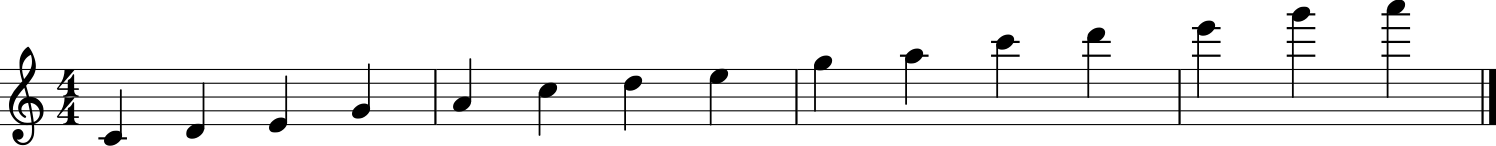

In [14]:
# Pentatonica: C D E G A C
octaves = ["4", "5", "6"]
scale = ["C", "D", "E", "G", "A"]
score = m21.stream.Score()
for octav in octaves:
    for n in scale:
        score.append(m21.note.Note(n+octav))
        
score.show()
score.show("midi")

In [15]:
fname = score.write("midi", "pent.mid")
wav_fname = fname.replace(".mid", ".wav")
if not os.path.isfile(wav_fname):
    from midi2audio import FluidSynth
    fs = FluidSynth()
    fs.midi_to_audio(fname, )


In [16]:
y, sr = lr.load(wav_fname)

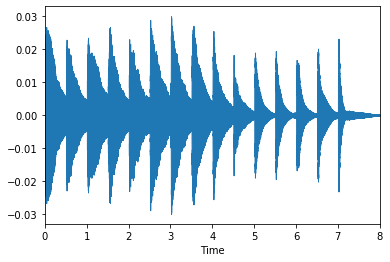

In [17]:
play(y, sr)

In [18]:
filename = librosa.example('trumpet')
y, sr = librosa.load(filename)

In [131]:
def Vis(new_y, y=None, kernel=None):
    if not(kernel is None):
        plt.figure()
        plt.plot(kernel, color="blue", alpha=0.5, label="Kernel")
        plt.legend()

    plt.figure()
        
    print("New")
    display(Audio(new_y, rate=sr))

    if not(y is None):
        print("Original")
        display(Audio(y, rate=sr))
        plt.plot(y, color="orange", label="Original")

    plt.plot(new_y, color="blue", label="New")
        
    plt.legend()
    plt.show()


    
def delay(y, sr, repetitions=1, duration=0.1):
    delay_len = int(sr*duration)
    x = np.linspace(0, 1 , delay_len)
    f = repetitions
    w = 2 * np.pi * f
    kernel = (np.cos(x * w) + 1) /2
    kernel *= 0.8
    kernel[-1] = 1
    kernel = kernel / np.linalg.norm(kernel)
    new_y = np.convolve(y, kernel)
    Vis(new_y, y, kernel)

    return new_y, kernel
    
    
def linear(y, sr, duration=0.1):
    delay_len = int(sr*duration)
    kernel = np.linspace(1, 0, delay_len)
    kernel[0] = 1
    kernel = kernel / np.linalg.norm(kernel)

    new_y = np.convolve(y, kernel)
    
def applyMultiplier(y, sr, intensity=100):
    new_y = y / intensity
    return new_y, None

New


Original


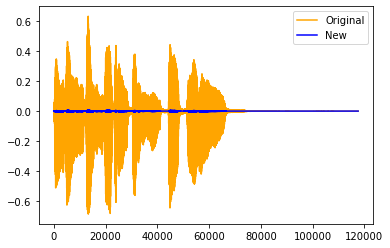

In [132]:
new_y, kernel = applyMultiplier(y, sr)
Vis(new_y, y, kernel)


In [94]:
filename = librosa.example('trumpet')
y, sr = librosa.load(filename)
Audio(y, rate=sr)